In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('kc_house_data.csv',encoding="latin-1")


Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
2.1.4 Изучите распределение года постройки

Условие 2: 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [14]:
year = []
month = []
for i in df['date']:
    if i[:4].isdigit():
           year.append(i[:4])
    if i[4:6].isdigit():
        month.append(i[4:6])         
        
df['year of sale'] = year     
df['month of sale'] = month      
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year of sale,month of sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,05
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,02
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,06
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,01


dtype('int64')

# 1.2 Изучите стоимости недвижимости 

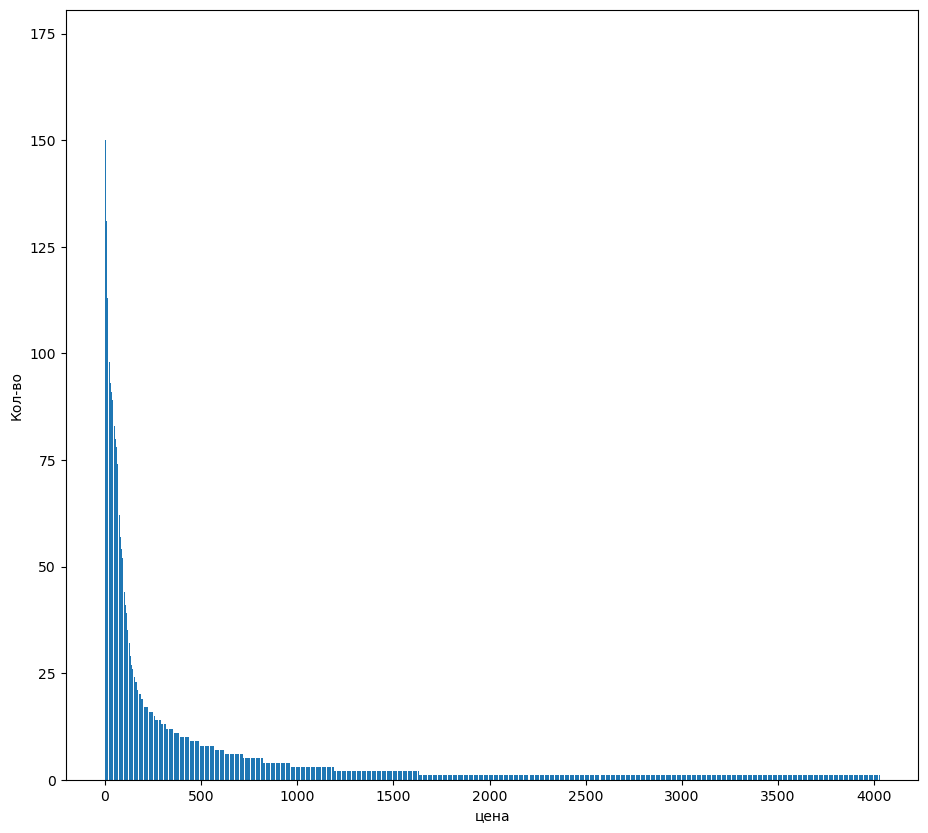

In [23]:

data = df.price.value_counts().reset_index()
data

plt.figure(figsize=(11,10))
plt.bar(data.index , data.price);
plt.xlabel("цена")
plt.ylabel("Кол-во")
plt.xticks();

# 1.3 Изучите распределение квадратуры жилой 

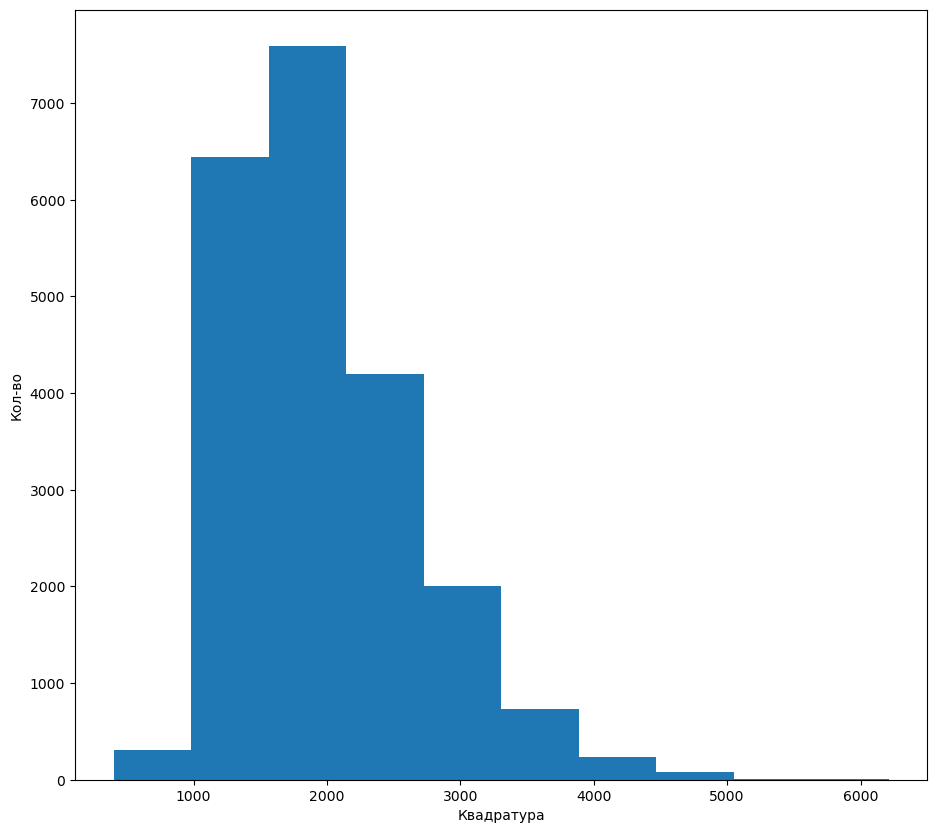

In [30]:
plt.figure(figsize=(11,10))
plt.hist(df.sqft_living15);
plt.xlabel("Квадратура")
plt.ylabel("Кол-во")
plt.xticks();

# 2.1 Изучите распределение домов от наличия вида на набережную Постройте график Сделайте выводы 

<BarContainer object of 2 artists>

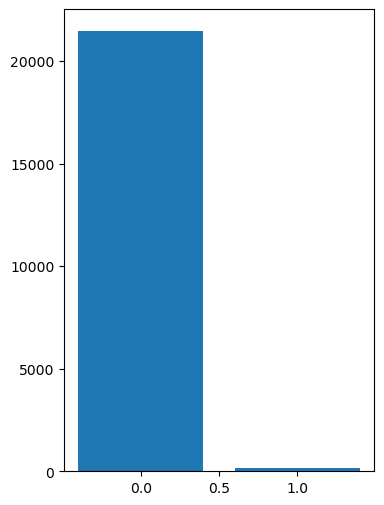

In [13]:
data = df['waterfront'].value_counts().reset_index()
data.head()
plt.figure(figsize=(4,6))
plt.bar(data.index,data.waterfront)
plt.ylabel("Количество домов")


# 2.2 Изучите распределение этажей домов

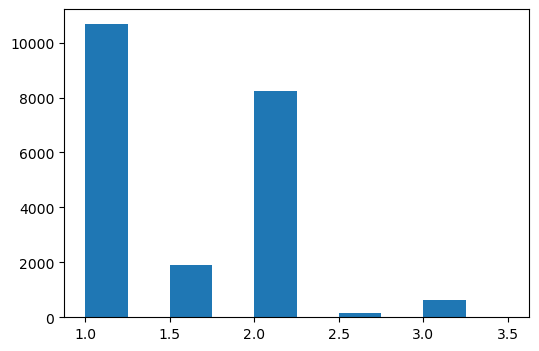

In [80]:
plt.figure(figsize=(6,4))
plt.hist(df.floors);

# 2.3 Изучите распределение состояния домов

<BarContainer object of 5 artists>

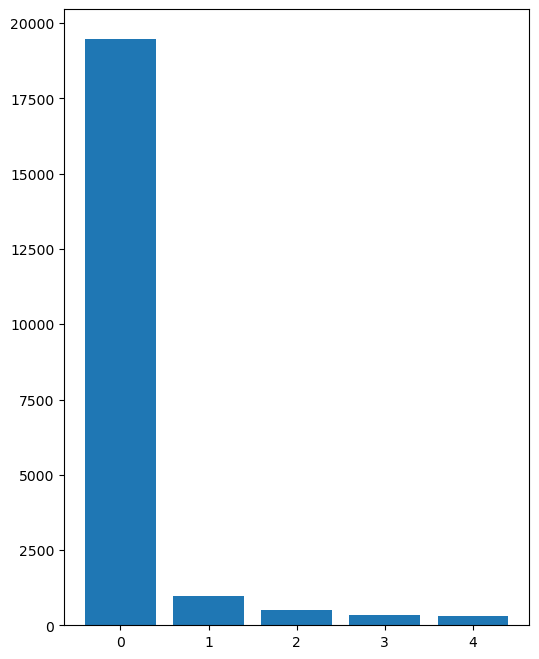

In [51]:
data = df.view.value_counts().reset_index()
data
plt.figure(figsize=(6,8))
plt.bar(data.index , data.view)

# Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением диаграмм . Анализ сделайте в  дополнить каждый график письменными выводами и наблюдениями.

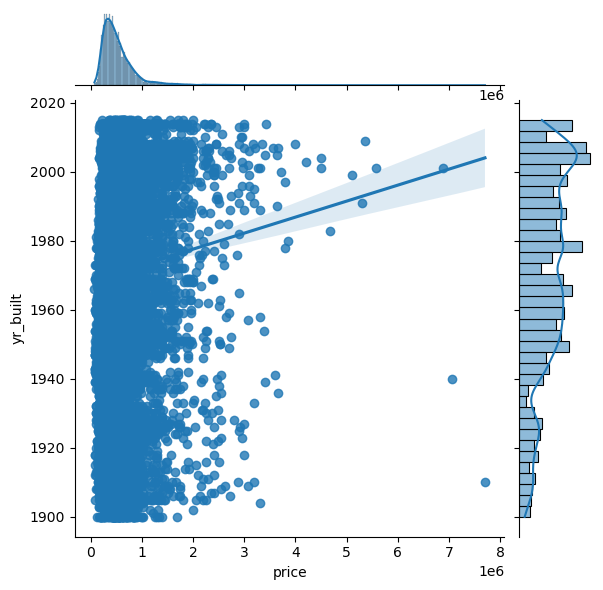

In [68]:
data_1 = df[['id','price']]
data_2 = df[['id','yr_built']]
dataId = data_1.set_index('id')
dataI = data_2.set_index('id')
data = dataId.join(dataI).reset_index()
data
sns.jointplot(x=data['price'], y=data['yr_built'], kind='reg');


Видим небольшую взаимосвязь что дома в промежутках между 60 -80 годамигод здания на цену


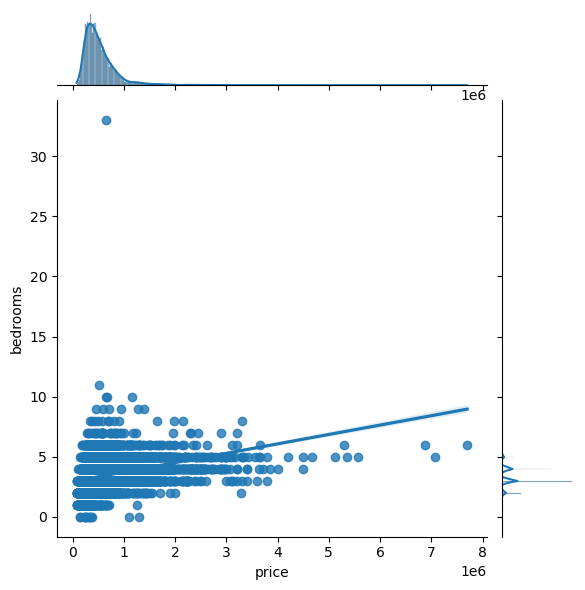

In [73]:
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg');

Можно увидить взаимосвязь, от цены и кол-во комнат 


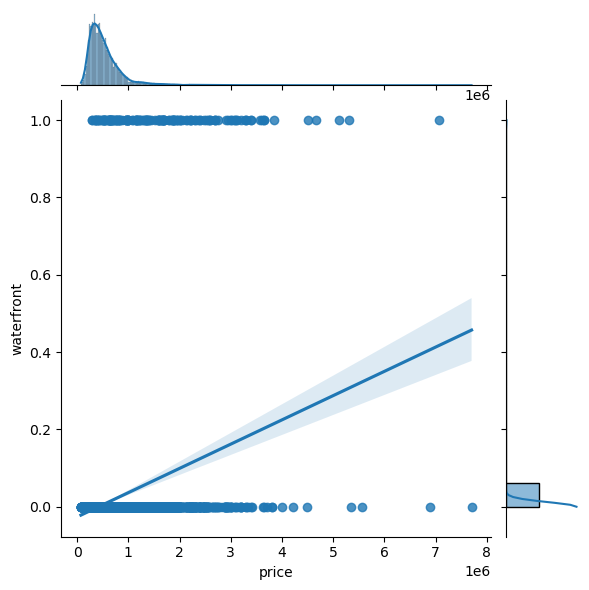

In [74]:
sns.jointplot(x=df['price'], y=df['waterfront'], kind='reg');